Breast Cancer Prediction using Decision Tree Diagnosis 

In [39]:
#importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

Task 1: Analysing the dataset

In [40]:
#loading dataset
 
data = pd.read_csv("breast-cancer.csv")
data.shape
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
#dropping the id column
data.drop('id', axis=1, inplace=True) #axis=1 means for column. inplace true is editing the existing dataset
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
print(pd.Series(data['diagnosis'].value_counts().sort_index()))

diagnosis
B    357
M    212
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

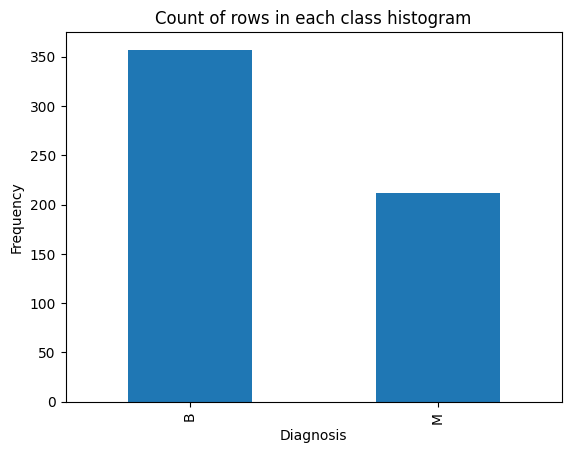

In [43]:
#plotting the occurances of each class
pd.Series(data['diagnosis'].value_counts().sort_index()).plot(kind = 'bar')
plt.title('Count of rows in each class histogram')
plt.xlabel("Diagnosis")
plt.ylabel("Frequency")

Task 2: Plotting heatmap for correlation data analysis

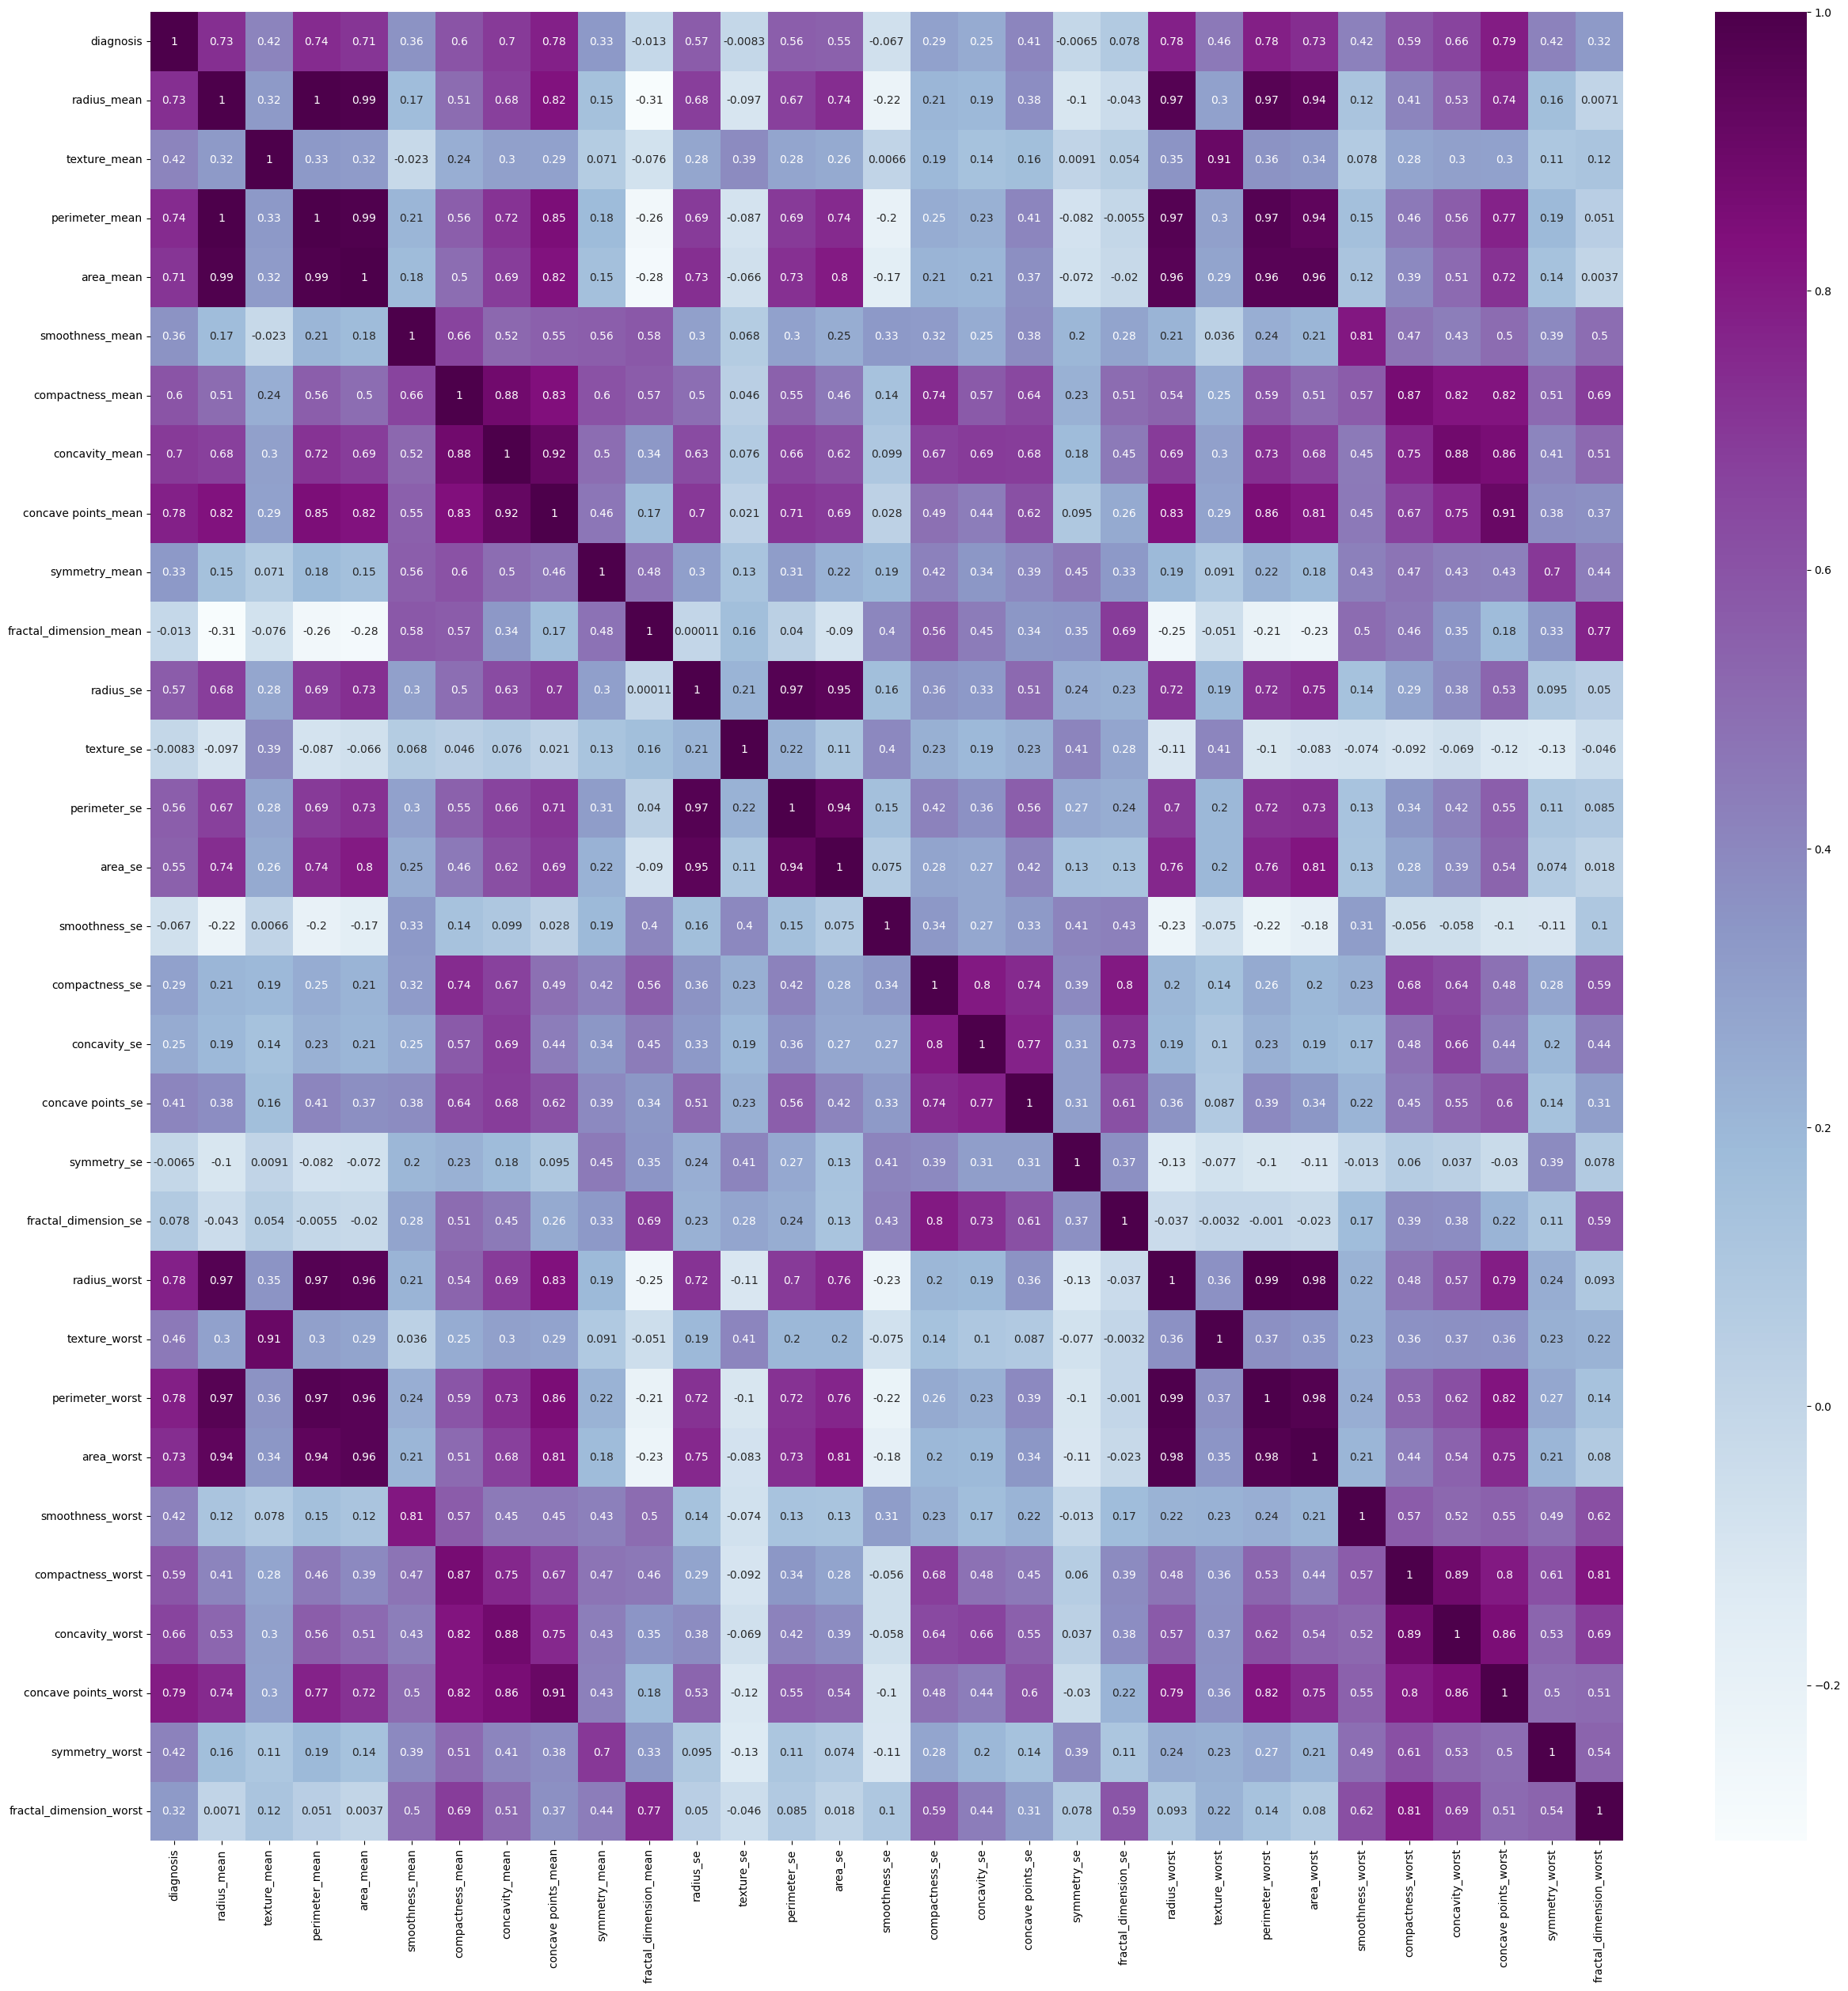

In [44]:
#plotting the heatmap to check the correlations between each columns in dataset

#encoding the target column (diagnosis) into M=1 and B=0
data['diagnosis'] = (data['diagnosis'] == 'M').astype(int) 

corr_matrix = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, cmap='BuPu', annot=True)
plt.show()




Task 3: Feature Selection
From above heatmap, it is observed that some features are not correlated with the diagnosis class. So those features are selected.

In [45]:
corr_values= abs(corr_matrix['diagnosis'])
#removing the features that consist featured less than 0.25 correlation
selected_features = corr_values[corr_values>0.25]
features_new = [i for i, value in selected_features.items()]
features_new.remove('diagnosis')
print(features_new)


['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [46]:
#splitting target and feature columns
X = data[features_new].values
y = data['diagnosis'].values.reshape(-1,1) #reshape 1 means take y as column, -1 not as row

In [47]:
#performing feature scaling
S = StandardScaler()
X = S.fit_transform(X)

In [48]:
#splitting the test and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

Task 4: Implementation of Decision Tree Model

In [49]:
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()
Model.fit(X_train, y_train)
pred = Model.predict(X_test)

#printing the accuracies 
print(f"Accuracy = {accuracy_score(y_test, pred)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(y_test, pred)}")
print(f"Confusion Matrix = \n{confusion_matrix(y_test, pred)}\n")


Accuracy = 0.9473684210526315
Balanced Accuracy = 0.9537162162162163
Confusion Matrix = 
[[69  5]
 [ 1 39]]



Task 5: Performing Tree Essembles for this DataSet
Implementation of Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf= model_rf.predict(X_test)

#printing the accuracies 
print(f"Accuracy = {accuracy_score(y_test, pred_rf)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(y_test, pred_rf)}")
print(f"Confusion Matrix = \n{confusion_matrix(y_test, pred_rf)}\n")


Accuracy = 0.9824561403508771
Balanced Accuracy = 0.9864864864864865
Confusion Matrix = 
[[72  2]
 [ 0 40]]



/Users/sharlenegandham/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Task 6: Implementation of XGBoost Classifier

In [58]:
from xgboost import XGBClassifier
model_xg = XGBClassifier(n_estimators=100, random_state=42)
model_xg.fit(X_train, y_train)
pred_xg= model_xg.predict(X_test)

#printing the accuracies 
print(f"Accuracy = {accuracy_score(y_test, pred_xg)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(y_test, pred_xg)}")
print(f"Confusion Matrix = \n{confusion_matrix(y_test, pred_xg)}\n")

Accuracy = 0.9912280701754386
Balanced Accuracy = 0.9932432432432432
Confusion Matrix = 
[[73  1]
 [ 0 40]]



Task 7: Comparing the accuracies of the above implemented three models 

In [59]:
models = pd.DataFrame({
    'Model' : ['Decision Tree Classifier', 'Random Forest Classifier','XgBoost'],
    'Score' : [balanced_accuracy_score(y_test,pred),balanced_accuracy_score(y_test,pred_rf),balanced_accuracy_score(y_test,pred_xg),]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,XgBoost,0.993243
1,Random Forest Classifier,0.986486
0,Decision Tree Classifier,0.953716
